##haggerty_energy_gdp_capstone notebook

##haggerty_energy_gdp_capstone questions:

1. How does energy production and consumption compare to GDP per capita at the state and national level?

2. What differences in the mix of energy (fossil fuels, nuclear, and renewable energy) and consumption rates can be identified across the states. What contributes to these differences.

3. What states have seen the greatest and least amount of growth in GDP per capita when compared to corresponding years for production and consumption of energy (considering all energy sources combined and fossil fuels, nuclear, and renewable energy separately)?

4. What has been the growth rate at the state and national level for GDP per capita and production and consumption of energy (considering all energy sources combined and fossil fuels, nuclear, and renewable energy separately)?

5. Where have negative impacts been observed. Can additional contributing factors be identified?

6. What technological advances are spurring the most growth in non-fossil fuel energy and can an economic impact be determined?

7. Stretch Question: What are the projections for continued growth in non-fossil fuels and does this appear to have a positive impact on the future economy?

In [1]:
##import python packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
##read in csv files
bea_gdp_63_97_df = pd.read_csv('../data/bea_sagdp2s__1963_1997_etl_uid.csv')
bea_gdp_97_22_df = pd.read_csv('../data/bea_sagdp2n_1997_2022_etl_uid.csv')
census_1910_2020_df = pd.read_csv('../data/census_res_pop_1910_2020_etl_uid.csv')
eia_production_mix_df = pd.read_csv('../data/eia_energy_mix_production_1960-2020_etl_uid.csv')
eia_consumption_mix_df = pd.read_csv('../data/eia_energy_mix_consumption_1960-2020_etl_uid-1.csv')
eia_expenditures_total_df = pd.read_csv('../data/eia_tot_expenditures_etl_uid.csv')


#view df heads
print(bea_gdp_63_97_df.head(3))
print(bea_gdp_97_22_df.head(3))
print(census_1910_2020_df.head(3))
print(eia_production_mix_df.head(3))
print(eia_consumption_mix_df.head(3))
print(eia_expenditures_total_df.head(3))

##if needed: extend / reset pandas view of df
##https://builtin.com/data-science/pandas-show-all-columns
##pd.set_option('display.max_columns', 80)
##pd.reset_option('display.max_columns')
##also works w/ display.max_rows

     table_id state_code     state_name  region table_name  line_code  \
0  gdp2s-us-1         US  United States     NaN    SAGDP2S          1   
1  gdp2s-us-2         US  United States     NaN    SAGDP2S          2   
2  gdp2s-us-3         US  United States     NaN    SAGDP2S          3   

  industry_classification                         description  \
0                     NaN                  All industry total   
1                     NaN                  Private industries   
2                       A  Agriculture, forestry, and fishing   

                          unit    1963  ...     1988     1989     1990  \
0  Millions of current dollars  607008  ...  5053003  5366080  5651747   
1  Millions of current dollars  534043  ...  4404809  4673612  4910078   
2  Millions of current dollars   20386  ...    85182    98725   104602   

      1991     1992     1993     1994     1995     1996     1997  
0  5842665  6167644  6467698  6912844  7299372  7749965  8284432  
1  5053494  533

In [3]:
##view df info
print(bea_gdp_63_97_df.info())
print(bea_gdp_97_22_df.info())
print(census_1910_2020_df.info())
print(eia_production_mix_df.info())
print(eia_consumption_mix_df.info())
print(eia_expenditures_total_df.info())

##note nulls in bea_gdp "region" & "industry_classification" and eia_expenditures "msn"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4680 entries, 0 to 4679
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   table_id                 4680 non-null   object 
 1   state_code               4680 non-null   object 
 2   state_name               4680 non-null   object 
 3   region                   4602 non-null   float64
 4   table_name               4680 non-null   object 
 5   line_code                4680 non-null   int64  
 6   industry_classification  4140 non-null   object 
 7   description              4680 non-null   object 
 8   unit                     4680 non-null   object 
 9   1963                     4680 non-null   int64  
 10  1964                     4680 non-null   int64  
 11  1965                     4680 non-null   int64  
 12  1966                     4680 non-null   int64  
 13  1967                     4680 non-null   int64  
 14  1968                    

In [4]:
##read in csv files from 'haggerty_energy_gdp' SQL DB export
##additional analysis as required / create visualizations

q1_consump_gdp_pop_prod_df = pd.read_csv('../sql_csv_exports/q1_consump_gdp_pop_prod.csv')
q2_consump_prod_consolidated_energy_mix_ranks_df = pd.read_csv('../sql_csv_exports/q2_consump_prod_consolidated_energy_mix_ranks.csv')
q3_chg_consump_prod_consolidated_energy_mix_ranks_df = pd.read_csv('../sql_csv_exports/q3_chg_consump_prod_consolidated_energy_mix_ranks.csv')
q4_pct_chg_consump_prod_consolidated_energy_mix_ranks_df = pd.read_csv('../sql_csv_exports/q4_pct_chg_consump_prod_consolidated_energy_mix_ranks.csv')

##display all columns
pd.set_option('display.max_columns', 14)
##pd.reset_option('display.max_columns')
##view heads
print(q1_consump_gdp_pop_prod_df.head(3))
print(q2_consump_prod_consolidated_energy_mix_ranks_df.head(3))
print(q3_chg_consump_prod_consolidated_energy_mix_ranks_df.head(3))
print(q4_pct_chg_consump_prod_consolidated_energy_mix_ranks_df.head(3))

##view df info
print(q1_consump_gdp_pop_prod_df.info())
print(q2_consump_prod_consolidated_energy_mix_ranks_df.info())
print(q3_chg_consump_prod_consolidated_energy_mix_ranks_df.info())
print(q4_pct_chg_consump_prod_consolidated_energy_mix_ranks_df.info())

##reset display.max_columns
##pd.reset_option('display.max_columns')


  state_code     category         unit     1970  rank_1970     1980  \
0         TX  Consumption  Billion Btu  6921781          1  9385532   
1         CA  Consumption  Billion Btu  5499139          2  6540472   
2         NY  Consumption  Billion Btu  4303439          3  3863274   

   rank_1980  ...  rank_1990      2000  rank_2000      2010  rank_2010  \
0          1  ...          1  12141592          1  11605812          1   
1          2  ...          2   7893262          2   7651772          2   
2          6  ...          4   4138667          5   3874609          6   

       2020  rank_2020  
0  13480760          1  
1   6922764          2  
2   3354222          8  

[3 rows x 15 columns]
  state_code                 category         unit     1970  rank_1970  \
0         TX  Fossil Fuel-Consumption  Billion Btu  6844936          1   
1         CA  Fossil Fuel-Consumption  Billion Btu  4805642          2   
2         PA  Fossil Fuel-Consumption  Billion Btu  4025797          3   

In [5]:
##read in csv files from 'haggerty_energy_gdp' SQL DB export
##additional analysis as required / create visualizations

q3_50_state_avg_amt_chg_consump_prod_consolidated_energy_mix_ranks_df = pd.read_csv('../sql_csv_exports/q3_50_state_avg_amt_chg_consump_prod_consolidated_energy_mix_ranks.csv')
q3_us_amt_chg_consump_prod_consolidated_energy_mix_ranks_df = pd.read_csv('../sql_csv_exports/q3_us_amt_chg_consump_prod_consolidated_energy_mix_ranks.csv')
q4_50_state_avg_pct_chg_consump_prod_consolidated_energy_mix_ranks_df = pd.read_csv('../sql_csv_exports/q4_50_state_avg_pct_chg_consump_prod_consolidated_energy_mix_ranks.csv')
q4_us_pct_chg_consump_prod_consolidated_energy_mix_ranks_df = pd.read_csv('../sql_csv_exports/q4_us_pct_chg_consump_prod_consolidated_energy_mix_ranks.csv')

##pd.reset_option('display.max_columns')
##view heads
print(q3_50_state_avg_amt_chg_consump_prod_consolidated_energy_mix_ranks_df.head(3))
print(q3_us_amt_chg_consump_prod_consolidated_energy_mix_ranks_df.head(3))
print(q4_50_state_avg_pct_chg_consump_prod_consolidated_energy_mix_ranks_df.head(3))
print(q4_us_pct_chg_consump_prod_consolidated_energy_mix_ranks_df.head(3))

##view df info
print(q3_50_state_avg_amt_chg_consump_prod_consolidated_energy_mix_ranks_df.info())
print(q3_us_amt_chg_consump_prod_consolidated_energy_mix_ranks_df.info())
print(q4_50_state_avg_pct_chg_consump_prod_consolidated_energy_mix_ranks_df.info())
print(q4_us_pct_chg_consump_prod_consolidated_energy_mix_ranks_df.info())


        description                 category         unit  avg_amt_chg_70_80  \
0  50 State Average  Fossil Fuel-Consumption  Billion Btu          129820.82   
1  50 State Average   Fossil Fuel-Production  Billion Btu           41220.46   
2  50 State Average      Nuclear-Consumption  Billion Btu           49996.44   

   avg_amt_chg_80_90  avg_amt_chg_90_00  avg_amt_chg_00_10  avg_amt_chg_10_20  
0           49181.44          245018.50          -76153.48         -153189.94  
1           26163.96          -97555.76          -33721.12           14890.52  
2           67303.56           35159.98           11441.68           -3730.36  
  description                 category         unit  amt_chg_70_80  \
0          US  Fossil Fuel-Consumption  Billion Btu        6385732   
1          US   Fossil Fuel-Production  Billion Btu        1600286   
2          US      Nuclear-Consumption  Billion Btu        2499822   

   amt_chg_80_90  amt_chg_90_00  amt_chg_00_10  amt_chg_10_20  
0        24489

In [6]:
q3_us_chg = q3_us_amt_chg_consump_prod_consolidated_energy_mix_ranks_df[['category', 'amt_chg_70_80','amt_chg_80_90', 'amt_chg_90_00', 'amt_chg_00_10', 'amt_chg_10_20']]
print(q3_us_chg)

                  category  amt_chg_70_80  amt_chg_80_90  amt_chg_90_00  \
0  Fossil Fuel-Consumption        6385732        2448930       12251133   
1   Fossil Fuel-Production        1600286        1453803       -3379030   
2      Nuclear-Consumption        2499822        3365181        1757999   
3    Renewable-Consumption        1354513         617379          62419   
4     Renewable-Production        2709026        1123893          -2578   

   amt_chg_00_10  amt_chg_10_20  
0       -3818729       -7673912  
1       -1511522         782700  
2         572084        -186518  
3        2163771        3142956  
4        2791749        6344414  


[Text(0.5, 0, 'Billion Btu'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Change from 1970 - 1980')]

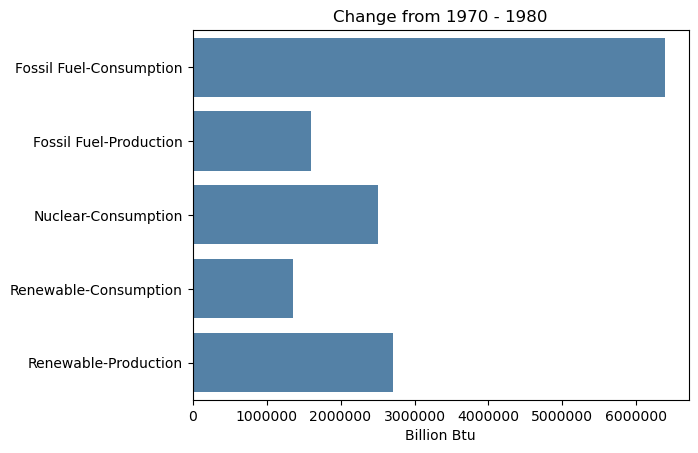

In [7]:
##sns.barplot(x=df.values_var, y=df.group_var, orient='h')

test = sns.barplot(x=q3_us_chg.amt_chg_70_80, y=q3_us_chg.category, orient='h', color='steelblue')
##stop scientific notation
plt.ticklabel_format(style='plain', axis='x')
test.set(xlabel= 'Billion Btu', ylabel= '', title='Change from 1970 - 1980')

In [8]:
##1. How does energy production and consumption compare to GDP per capita at the state and national level?
## q1_consump_gdp_pop_prod_df

q1_prod_test = q1_consump_gdp_pop_prod_df.loc[(q1_consump_gdp_pop_prod_df['category'] == 'Production')]
q1_prod_test = q1_prod_test[['state_code', '1970', '1980', '1990', '2000', '2010', '2020']]
print(q1_prod_test)
transposed_q1_prod_test = q1_prod_test.transpose()
print(transposed_q1_prod_test)

    state_code      1970      1980      1990     2000      2010      2020
150         TX  16540958  13294899  10578173  9681342  11384911  23329131
151         LA   9358093   4403760   3137054  2750023   3173816   3838280
152         WV   3956963   3325747   4686846  4338635   3703823   5020189
153         CA   3309614   2999601   3278511  3067393   2534508   2190166
154         KY   3231222   3863932   4578095  3413474   2787102    756015
155         OK   3120462   3099268   3224919  2273699   2587961   4545564
156         PA   2533825   2754247   2734808  2994281   3078204   9492059
157         NM   2202887   2112002   1973469  2718824   2248542   4673691
158         IL   1776784   1886841   2344501  1888998   2125871   2160217
159         KS   1492430   1175714   1060694   906013    811892    759592
160         OH   1453233   1227811   1232801   930383   1044134   3186943
161         WY   1436717   2898616   4663386  7491338  10528548   5884410
162         VA   1025855   1281987   1

In [9]:
##transposing data fame moved index to the header and required additional coding to reset....additonally left "state_code" as index with years listed below
##tranposing does not seem to be helpful
transposed_q1_prod_test.columns = transposed_q1_prod_test.iloc[0]
transposed_q1_prod_test = transposed_q1_prod_test[1:]
##transposed_q1_prod_test.rename(columns=transposed_q1_prod_test.iloc[0]).drop(transposed_q1_prod_test.index[0])
transposed_q1_prod_test.reset_index(inplace = True)
transposed_q1_prod_test


state_code,index,TX,LA,WV,CA,KY,OK,...,MN,NH,NV,VT,DE,RI,HI
0,1970,16540958,9358093,3956963,3309614,3231222,3120462,...,32822,25321,19186,14717,7021,5268,1559
1,1980,13294899,4403760,3325747,2999601,3863932,3099268,...,164168,32382,32507,55378,2472,7287,12808
2,1990,10578173,3137054,4686846,3278511,4578095,3224919,...,188338,90006,52932,57751,1653,4499,27937
3,2000,9681342,2750023,4338635,3067393,3413474,2273699,...,238587,121237,48347,68821,2291,4520,20387
4,2010,11384911,3173816,3703823,2534508,2787102,2587961,...,431947,159178,51437,82407,3842,3726,15285
5,2020,23329131,3838280,5020189,2190166,756015,4545564,...,505243,148723,116402,37481,3571,11420,27957


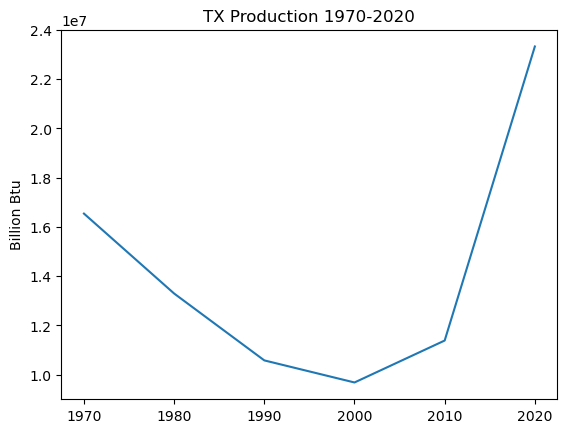

In [11]:
tx_test = sns.lineplot(x='index' ,y='TX', data=transposed_q1_prod_test)
##stop scientific notation
##plt.ticklabel_format(style='plain', axis='y')
tx_test.set(xlabel='', ylabel='Billion Btu', title='TX Production 1970-2020')
##plt.xlabel("")
##plt.ylabel("Billion Btu")
##plt.title("TX Production 1970-2020")
plt.show()

In [4]:
fact_table_df = pd.read_csv('../sql_csv_exports/fact_table_q1_q2_sql_consolidated_1.csv')
print(fact_table_df.head(1))

  state_code            category  year     unit      amount
0         AK  All Industry Total  1970  Dollars  2359000000


<function matplotlib.pyplot.show(close=None, block=None)>

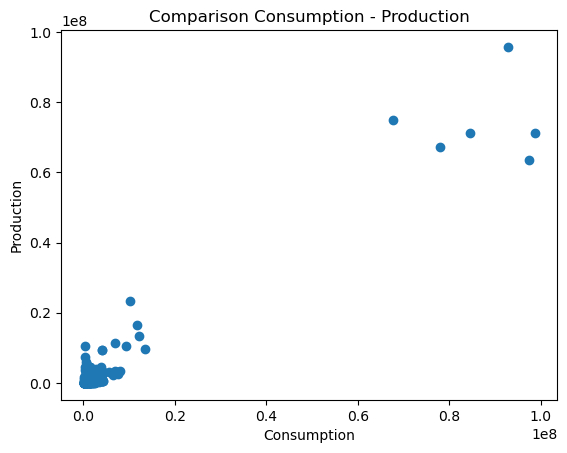

In [90]:
dataset = fact_table_df.loc[(fact_table_df['category'] == 'Consumption')]
dataset_1 = fact_table_df.loc[(fact_table_df['category'] == 'Production')]
plt.scatter(x = dataset.amount, y = dataset_1.amount) 
plt.title('Comparison Consumption - Production')
plt.xlabel('Consumption')
plt.ylabel('Production')
plt.show

In [60]:
dataset = fact_table_df.loc[(fact_table_df['category'] == 'Consumption')]
dataset_1 = fact_table_df.loc[(fact_table_df['category'] == 'Production')]
##dataset_1 = dataset_1.rename(columns={'amount' : 'amount_1'})
numbers = dataset_1['amount']
dataset['amount_1'] = dataset.join(numbers)
print(dataset.head())

ValueError: columns overlap but no suffix specified: Index(['amount'], dtype='object')

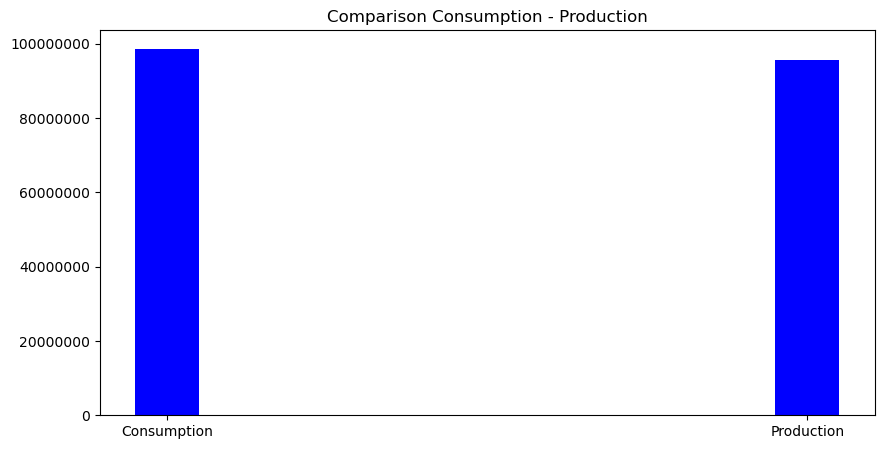

In [89]:
dataset = fact_table_df.loc[(fact_table_df['category'] == 'Consumption') | (fact_table_df['category'] == 'Production')]
plt.figure(figsize = (10, 5))
plt.ticklabel_format(style='plain') 
plt.bar(dataset.category,dataset.amount, color ='blue', width = 0.1)
plt.title('Comparison Consumption - Production')
plt.show()

In [82]:
print(dataset.head(5))

   state_code     category  year         unit  amount
6          AK  Consumption  2000  Billion Btu  742061
7          AK  Consumption  1970  Billion Btu  182039
8          AK  Consumption  2020  Billion Btu  640132
9          AK  Consumption  2010  Billion Btu  639266
10         AK  Consumption  1990  Billion Btu  584082


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.scatter(dataset.amount.1, dataset.amount)
sns.lmplot(x='amount.1', y='amount', data=dataset, hue='category', legend=False, fit_reg=False).set(title='Comparison GDP per Capita - Consumption')
plt.ticklabel_format(style='plain')
plt.title('Comparison GDP per Capita - Consumption')
plt.xlabel('GDP per Capita - Dollars')
plt.ylabel('Consumption - Billion Btu')
plt.show()

In [ ]:
sns.swarmplot(x='amount.1', y='amount', data=dataset, legend=False, fit_reg=False).set(title='Comparison GDP per Capita - Consumption')
plt.ticklabel_format(style='plain')
plt.title('Comparison GDP per Capita - Consumption')
plt.xlabel('GDP per Capita - Dollars')
plt.ylabel('Consumption - Billion Btu')
plt.show()
